#### Graduate Rotational Internship Program : SPARKS FOUNDATION - : TASK - 5 .

##### Name: Kumar Ankit

##### Domain: Data Science and Business Analytics.

##### Task 5: Perform ‘Exploratory Data Analysis’ on dataset ‘Sports'.

##### Purpose: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

#####          As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

#####         Suggest teams or players a company should endorse for its products.

##### Level: Intermediate

### First : Importing All Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

### Second : Reading Dataset to Jupiter Notebook :

In [2]:
matches = pd.read_csv('E:\matches.csv')
deliveries = pd.read_csv('E:\deliveries.csv')
print('shape of match data',matches.shape)
print('shape of deliveries data',deliveries.shape)

shape of match data (756, 18)
shape of deliveries data (179078, 21)


In [3]:
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [4]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


### Third : Data Cleaning

In [5]:
print(matches.duplicated().sum())
print(deliveries.duplicated().sum())    ## Printing Duplicate values for match & Deliveries

0
23


In [6]:
deliveries.drop_duplicates(inplace=True)

In [7]:
matches.isnull().sum()    ## Checking Null values for Matches

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
deliveries.isnull().sum()  ## Checking Null values for Deliveries 

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [9]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [11]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [12]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Visualizations

##### Player of the match most times

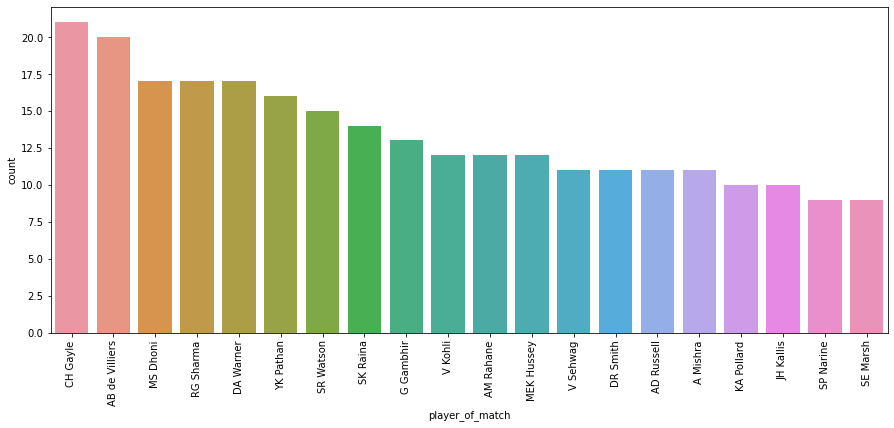

In [13]:
plt.figure(figsize=(15,6))
fav_cities = matches['player_of_match'].value_counts().reset_index()
fav_cities.columns = ['player_of_match','count']
sns.barplot(x = 'player_of_match',y = 'count', data = fav_cities[:20])
plt.xticks(rotation=90)
plt.show()

##### Highest no of wins

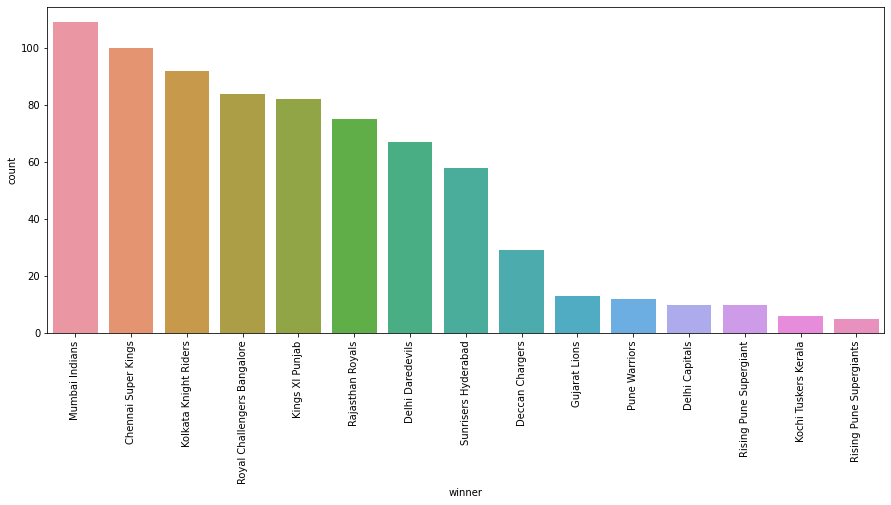

In [14]:
plt.figure(figsize=(15,6))
fav_cities = matches['winner'].value_counts().reset_index()
fav_cities.columns = ['winner','count']
sns.barplot(x = 'winner',y = 'count', data = fav_cities[:20])
plt.xticks(rotation=90)
plt.show()

##### Favourite umpires

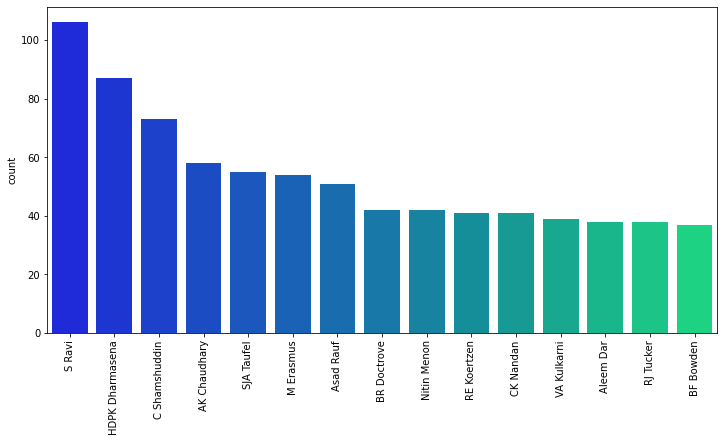

In [15]:
plt.figure(figsize=(12,6))
ump = pd.DataFrame(pd.concat([matches['umpire1'], matches['umpire2']]),columns = ['count'])
ump = ump.apply(pd.value_counts)
sns.barplot(x = ump[:15].index, y= ump[:15]['count'], palette = 'winter')
plt.xticks(rotation=90)
plt.show()

##### No of matches played in stadium

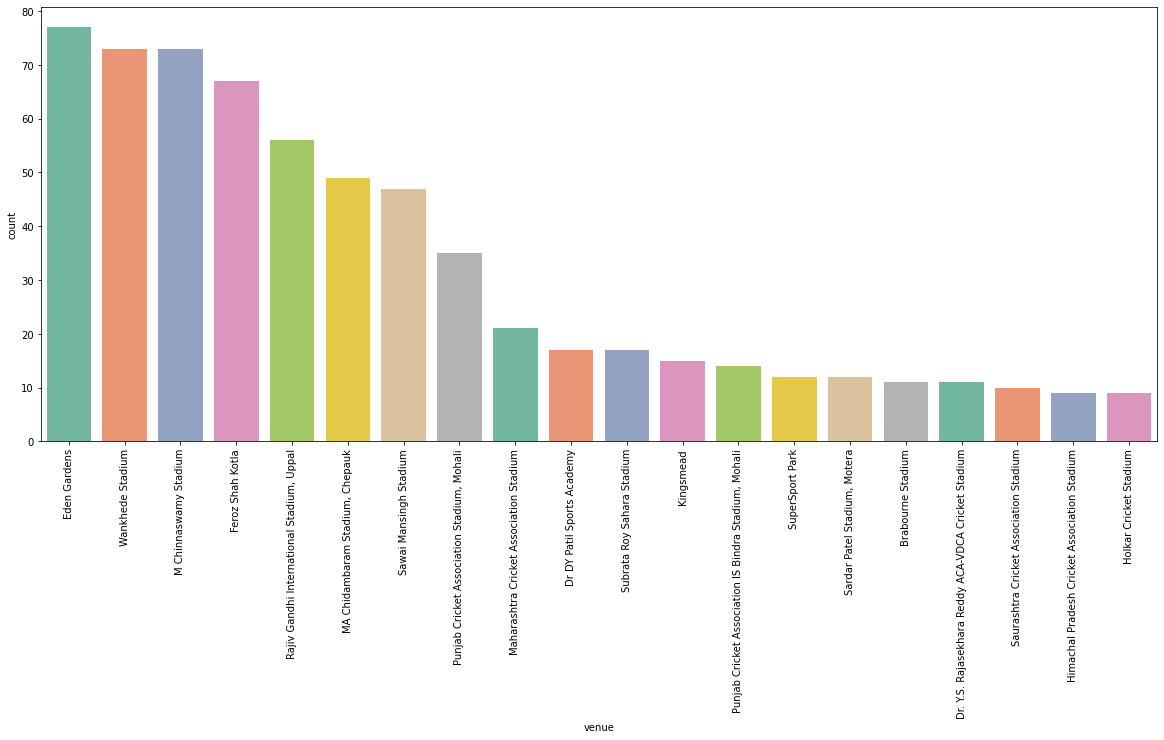

In [16]:
plt.figure(figsize=(20,8))
fav_ground = matches['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','count']
sns.barplot(y = 'count',x = 'venue', data = fav_ground[:20], palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

##### Highest run scorer in IPL

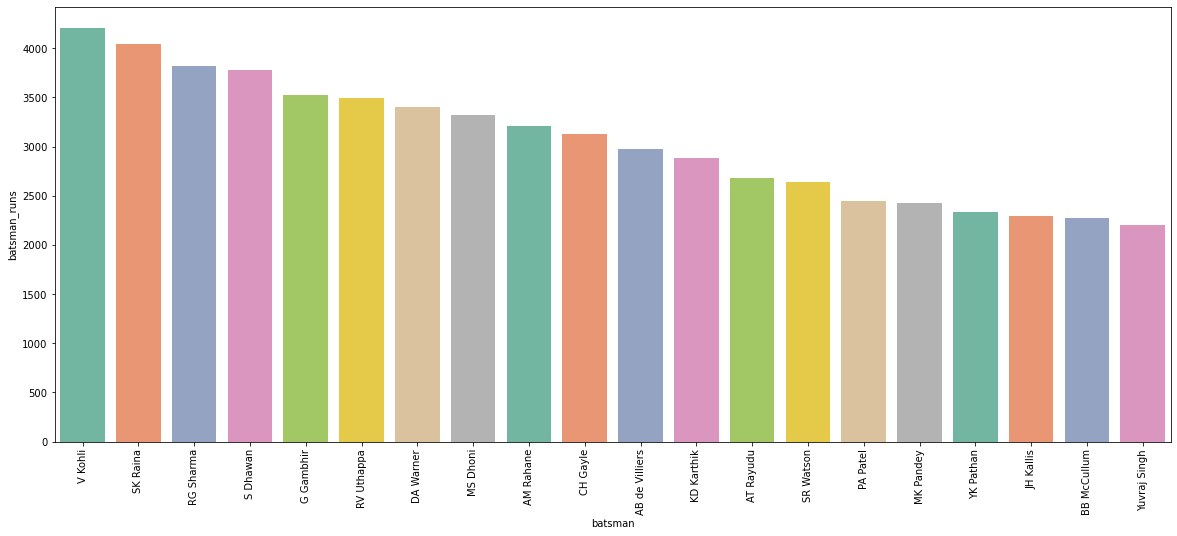

In [17]:
plt.figure(figsize=(20,8))
fav_ground = deliveries['batsman'].value_counts().reset_index()
fav_ground.columns = ['batsman','batsman_runs']
sns.barplot(x = 'batsman',y = 'batsman_runs', data = fav_ground[:20], palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

##### Toss Decision to field or bat across seasons

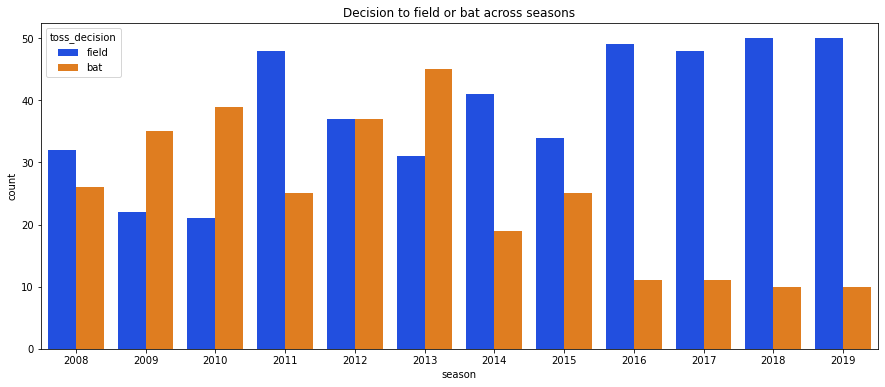

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(x='season',hue='toss_decision',data=matches ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()

##### Match Played each Season

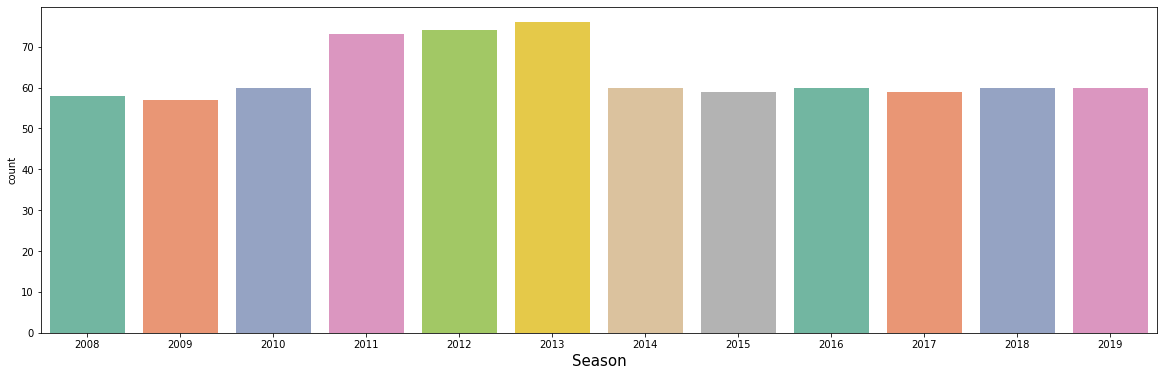

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(x='season',data=matches,palette='Set2')
plt.xlabel('Season',fontsize=15)
plt.show()

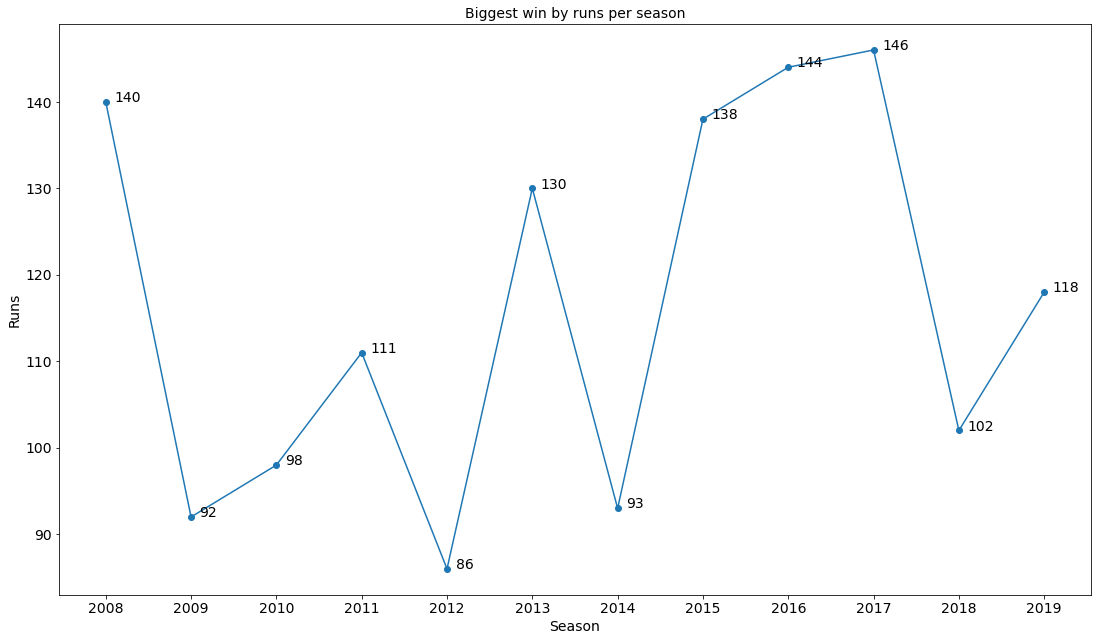

In [20]:
s=2008
season=[]
win_by_runs_max=[]
while s<2020:
    season.append(s)
    win_by_runs_max.append(matches[matches['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

##### Stadium wise winnings

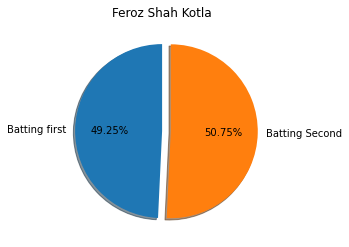

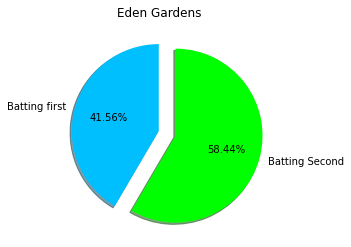

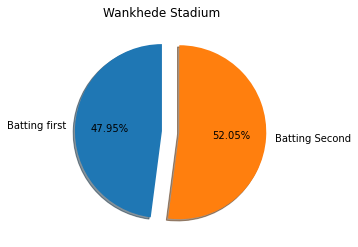

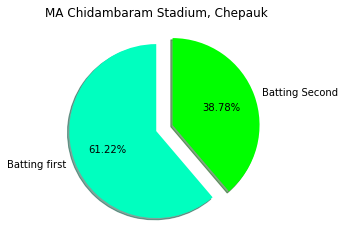

In [21]:
# 'Feroz Shah Kotla'
Delhi_stadium=matches.loc[(matches['venue']=='Feroz Shah Kotla') ]
Delhi_stadium_win_by_runs=Delhi_stadium[Delhi_stadium['win_by_runs']>0]
slices=[len(Delhi_stadium_win_by_runs),len(Delhi_stadium)-len(Delhi_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.1),autopct='%1.2f%%')
plt.title('Feroz Shah Kotla')
plt.show()

# Eden Gardens
Kolkata_stadium=matches.loc[(matches['venue']=='Eden Gardens') ]
Kolkata_stadium_win_by_runs=Kolkata_stadium[Kolkata_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Kolkata_stadium_win_by_runs),len(Kolkata_stadium)-len(Kolkata_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%',colors=['#00bfff','#00ff00'])
plt.title('Eden Gardens')
plt.show()

# 'Wankhede Stadium'
Mumbai_stadium=matches.loc[(matches['venue']=='Wankhede Stadium') ]
Mumbai_stadium_win_by_runs=Mumbai_stadium[Mumbai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Mumbai_stadium_win_by_runs),len(Mumbai_stadium)-len(Mumbai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%')
plt.title('Wankhede Stadium')
plt.show()

# 'MA Chidambaram Stadium, Chepauk'
Chennai_stadium=matches.loc[(matches['venue']=='MA Chidambaram Stadium, Chepauk') ]
Chennai_stadium_win_by_runs=Chennai_stadium[Chennai_stadium['win_by_runs']>0]# As it is  win by runs this depicts Team batting First Has Won the match
slices=[len(Chennai_stadium_win_by_runs),len(Chennai_stadium)-len(Chennai_stadium_win_by_runs)]
labels=['Batting first','Batting Second']
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0,0.2),autopct='%1.2f%%',colors=['#00ffbf','#00ff00'])
plt.title('MA Chidambaram Stadium, Chepauk')
plt.show()

##### Total Runs each season

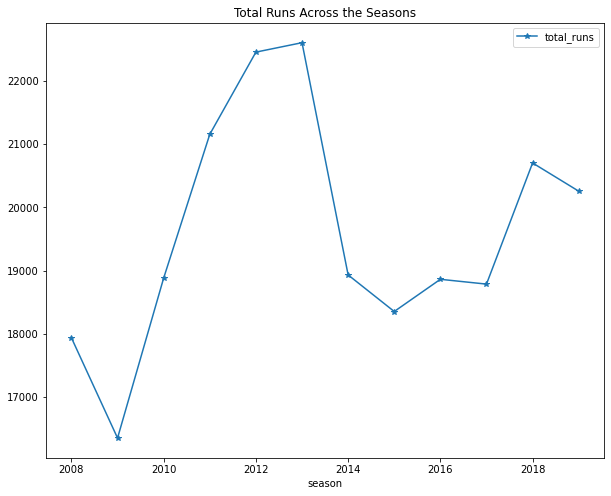

In [22]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='*')
plt.gcf().set_size_inches(10,8)
plt.title('Total Runs Across the Seasons')
plt.show()

##### Boundaries

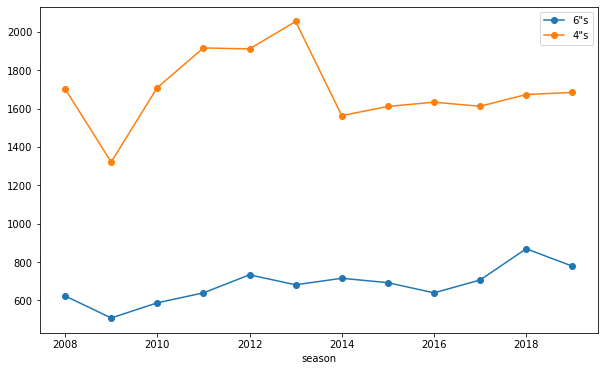

In [23]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
a=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(a,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})
Season_boundaries.set_index('season')[['6"s','4"s']].plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

##### Highest Run by teams

In [24]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,239
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232
